In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets 
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# fetch the iris dataset and make it dataframe also arrange the input and output
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=['Sepal length', 'Sepal width', 
                                     'Petal length', 'Petal width'])  # inputs(independent variables)
y = pd.DataFrame(iris.target, columns=["Class labels"])  # outputs(dependent variables)

In [3]:
# concat of inputs and outputs and make a whole dataset 
whole_iris = pd.concat([X,y], axis=1)

In [4]:
# turn the class labels into class names 
Class_names = []
for i in whole_iris["Class labels"]:
    if i == 0:
        i = "Iris-setosa"
        Class_names.append(i)
    elif i == 1:
        i = "Iris-versicolor"
        Class_names.append(i)
    else:
        i = "Iris-virginica"
        Class_names.append(i)
whole_iris["Class names"] = Class_names
whole_iris

,Sepal length,Sepal width,Petal length,Petal width,Class labels,Class names
0,5.1,3.5,1.4,0.2,0,Iris-setosa
1,4.9,3.0,1.4,0.2,0,Iris-setosa
2,4.7,3.2,1.3,0.2,0,Iris-setosa
3,4.6,3.1,1.5,0.2,0,Iris-setosa
4,5.0,3.6,1.4,0.2,0,Iris-setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,Iris-virginica
146,6.3,2.5,5.0,1.9,2,Iris-virginica
147,6.5,3.0,5.2,2.0,2,Iris-virginica
148,6.2,3.4,5.4,2.3,2,Iris-virginica


In [5]:
# Some basic statistical analysis about the whole iris data
whole_iris.describe()

,Sepal length,Sepal width,Petal length,Petal width,Class labels
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


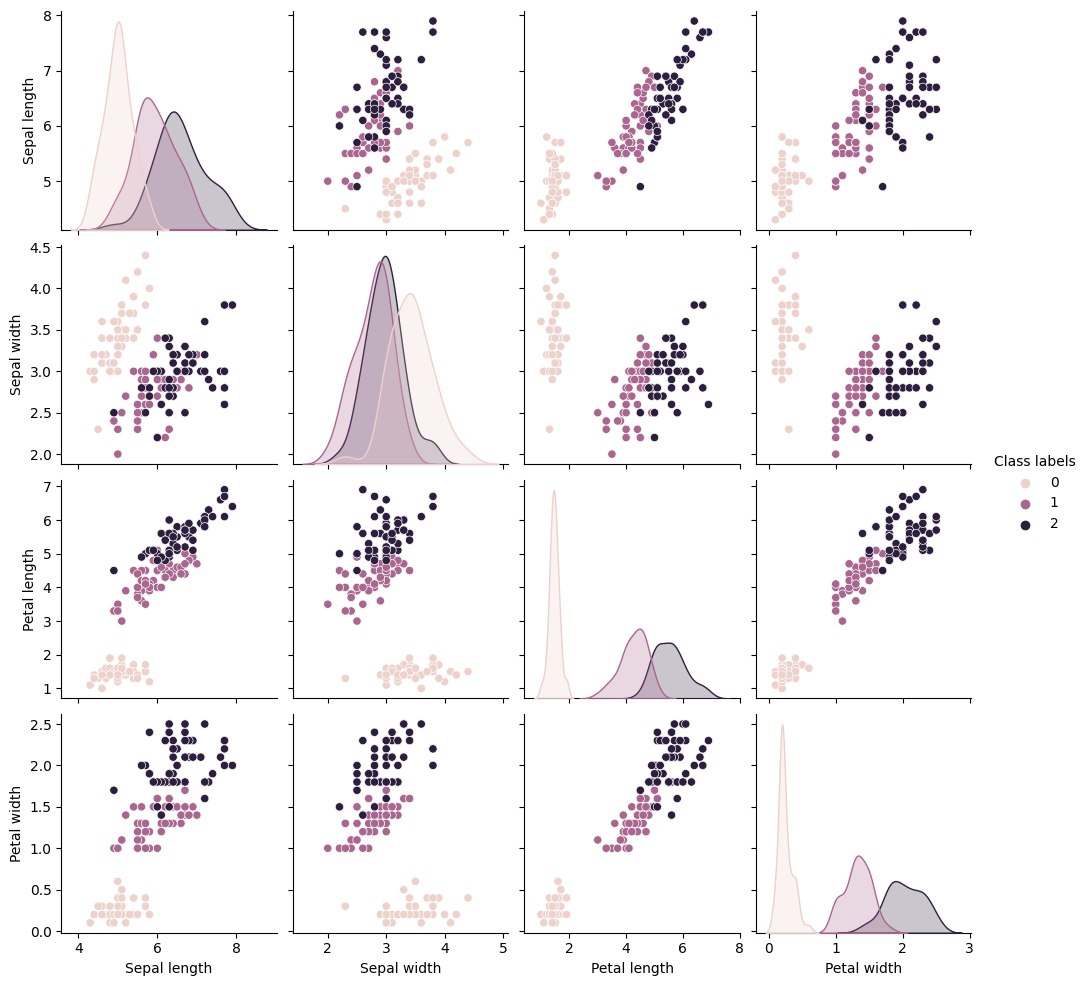

In [6]:
# Visualize the whole iris dataset
sns.pairplot(whole_iris, hue='Class labels')

In [7]:
# Creating Dependent and Independent Variables
X = iris.data    # Independent
y = iris.target  # Dependent
print(f"input shape: {X.shape}, target shape: {y.shape}")

input shape: (150, 4), target shape: (150,)


In [8]:
# for train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 31)

In [9]:
# defining the function that multiple machine learning classifier include
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def all_classifiers(X_train, X_test, y_train, y_test):
    """
    This function use multple machine learning classifier and show us the results of them 
    :param X_train: train input
    :param X_test: test input
    :param y_train: train output
    :param y_test: test output
    :return: accuracy score, classification report, confusion matrix for each classifier
    """
    
    # standardization of train and test data
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # for Support Vector Machine Classifier
    print("*************************************************************************")
    svm_model = SVC()
    svm_model.fit(X_train, y_train)
    svm_train_predictions = svm_model.predict(X_train)
    svm_test_predictions = svm_model.predict(X_test)
    print('Train Accuracy Score for Support Vector Machine Model:', accuracy_score(svm_train_predictions, y_train))
    print("Test Accuracy Score for Support Vector Machine Model:", accuracy_score(svm_test_predictions, y_test))
    print(confusion_matrix(y_test, svm_test_predictions))
    print(classification_report(y_test, svm_test_predictions))
    
    
    # for Decision Tree Classifier
    print("*************************************************************************")
    decisiont_model = DecisionTreeClassifier()
    decisiont_model.fit(X_train, y_train)
    dt_train_predictions = decisiont_model.predict(X_train)
    dt_test_predictions = decisiont_model.predict(X_test)
    print('Train Accuracy Score for Decision Tree Model:', accuracy_score(dt_train_predictions, y_train))
    print("Test Accuracy Score for Decision Tree Model:", accuracy_score(dt_test_predictions, y_test))
    print(confusion_matrix(y_test, dt_test_predictions))
    print(classification_report(y_test, dt_test_predictions))
    
    
    # for GaussianNB Classifier
    print("*************************************************************************")
    gnb_model = GaussianNB()
    gnb_model.fit(X_train, y_train)
    gnb_train_predictions = gnb_model.predict(X_train)
    gnb_test_predictions = gnb_model.predict(X_test)
    print('Train Accuracy Score for GaussianNB Classifier:', accuracy_score(gnb_train_predictions, y_train))
    print("Test Accuracy Score for GaussianNB Classifier:", accuracy_score(gnb_test_predictions, y_test))
    print(confusion_matrix(y_test, gnb_test_predictions))
    print(classification_report(y_test, gnb_test_predictions))
    
    
    # for Bagging Classifier
    print("*************************************************************************")
    bag_model = BaggingClassifier()
    bag_model.fit(X_train, y_train)
    bag_train_predictions = bag_model.predict(X_train)
    bag_test_predictions = bag_model.predict(X_test)
    print('Train Accuracy Score for Bagging Classifier:', accuracy_score(bag_train_predictions, y_train))
    print("Test Accuracy Score for Bagging Classifier:", accuracy_score(bag_test_predictions, y_test))
    print(confusion_matrix(y_test, bag_test_predictions))
    print(classification_report(y_test, bag_test_predictions))

    
    # for Random Forest Classifier
    print("*************************************************************************")
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)
    rf_train_predictions = rf_model.predict(X_train)
    rf_test_predictions = rf_model.predict(X_test)
    print('Train Accuracy Score for Random Forest Classifier:', accuracy_score(rf_train_predictions, y_train))
    print("Test Accuracy Score for Random Forest classifier:", accuracy_score(rf_test_predictions, y_test))
    print(confusion_matrix(y_test, rf_test_predictions))
    print(classification_report(y_test, rf_test_predictions))
    
    
    # for Ada Boost Classifier
    print("*************************************************************************")
    ada_model = AdaBoostClassifier()
    ada_model.fit(X_train, y_train)
    ada_train_predictions = ada_model.predict(X_train)
    ada_test_predictions = ada_model.predict(X_test)
    print('Train Accuracy Score for Ada Boost Classifier:', accuracy_score(ada_train_predictions, y_train))
    print("Test Accuracy Score Ada Boost Classifier:", accuracy_score(ada_test_predictions, y_test))
    print(confusion_matrix(y_test, ada_test_predictions))
    print(classification_report(y_test, ada_test_predictions))
    
    
    # for K-Neighbors Classifier
    print("*************************************************************************")
    kn_model = KNeighborsClassifier()
    kn_model.fit(X_train, y_train)
    kn_train_predictions = kn_model.predict(X_train)
    kn_test_predictions = kn_model.predict(X_test)
    print('Train Accuracy Score for K-Neighbors classifier:', accuracy_score(kn_train_predictions, y_train))
    print("Test Accuracy Score for K-Neighbors Classifier:", accuracy_score(kn_test_predictions, y_test))
    print(confusion_matrix(y_test, kn_test_predictions))
    print(classification_report(y_test, kn_test_predictions))
    
    
    # for Logistic Regression Classifier
    print("*************************************************************************")
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)
    lr_train_predictions = lr_model.predict(X_train)
    lr_test_predictions = lr_model.predict(X_test)
    print('Train Accuracy Score for Logistic Regression Classifier:', accuracy_score(lr_train_predictions, y_train))
    print("Test Accuracy Score for Logistic Regression Classifier:", accuracy_score(lr_test_predictions, y_test))
    print(confusion_matrix(y_test, lr_test_predictions))
    print(classification_report(y_test, lr_test_predictions))
    
    
    # for XGBoost Classifier
    print("*************************************************************************")
    xgb_model = XGBClassifier()
    xgb_model.fit(X_train, y_train)
    xgb_train_predictions = xgb_model.predict(X_train)
    xgb_test_predictions = xgb_model.predict(X_test)
    print('Train Accuracy Score for XGBoost Classifier:', accuracy_score(xgb_train_predictions, y_train))
    print("Test Accuracy Score for XGBoost Classifier:", accuracy_score(xgb_test_predictions, y_test))
    print(confusion_matrix(y_test, xgb_test_predictions))
    print(classification_report(y_test, xgb_test_predictions))
    print("*************************************************************************")
    
    print("----------------Summary----------------")
    print("SVM Test Accuracy:", accuracy_score(svm_test_predictions, y_test))
    print("Decision Tree Test Accuracy:", accuracy_score(dt_test_predictions, y_test))
    print("GaussianNB Test Accuracy:", accuracy_score(gnb_test_predictions, y_test))
    print("Bagging Test Accuracy:", accuracy_score(bag_test_predictions, y_test))
    print("Random Forest Test Accuracy:", accuracy_score(rf_test_predictions, y_test))
    print("Ada Boost Test Accuracy:", accuracy_score(ada_test_predictions, y_test))
    print("K-Neighbors Test Accuracy:", accuracy_score(kn_test_predictions, y_test))
    print("Logistic Regression Test Accuracy:", accuracy_score(lr_test_predictions, y_test))
    print("XGBoost Test Accuracy:", accuracy_score(xgb_test_predictions, y_test))

In [10]:
all_classifiers(X_train, X_test, y_train, y_test)

*************************************************************************
Train Accuracy Score for Support Vector Machine Model: 0.975
Test Accuracy Score for Support Vector Machine Model: 0.9666666666666667
[[ 8  0  0]
 [ 0 11  1]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.92      0.96        12
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

*************************************************************************
Train Accuracy Score for Decision Tree Model: 1.0
Test Accuracy Score for Decision Tree Model: 0.9333333333333333
[[ 8  0  0]
 [ 0 10  2]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.83      0